
# Problem given: 

We want to build an automated machine learning pipeline so that this loan model can get continuous updates and fine-tuning.
We are not considering the fraud detection scenarios as per assignment ask

In simple terms: For this assignment, we want you to build this machine learning pipeline. 
This pipeline should be able to run independently when the assessment is submitted and should only require the same input file to run from end to end. An input data file (loan.csv) has been provided to help you kickstart building this machine learning pipeline


Prediction: Risk of loan applications === funded or not funded

Note: this notebook can be a little unstructured as it was all about exploring data and I have refered documentations too related to data explorations process and for good plotting graphs too but I know the concepts and when to use them 

In [22]:
# Data analysis
import math
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='whitegrid', palette='pastel')

# Preprocessing
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from pdpbox import pdp


# data loading and relevant dataframe creation steps

In [70]:
#EDA
# ../../data --> data folder inside root 

#loan csv [577682 rows × 19 columns]
loan_csv = pd.read_csv('../../data/loan.csv', parse_dates=['applicationDate', 'originatedDate'])

# Display result
loan_csv.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [71]:
#clarity_underwriting_variables csv [49752 rows × 54 columns]
underwriting_var_csv = pd.read_csv('../../data/clarity_underwriting_variables.csv', low_memory=False)
# Display result
underwriting_var_csv.head()



,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk,.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious,.underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential,.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate,.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk,.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile,.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified,.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased,.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly,.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18,.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate,.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile,.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone,.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudiden

In [72]:
print(underwriting_var_csv['clearfraudscore'])


0        871.0
1        397.0
2        572.0
3        838.0
4        768.0
         ...  
49747    677.0
49748    640.0
49749    576.0
49750    830.0
49751    793.0
Name: clearfraudscore, Length: 49752, dtype: float64


In [73]:
#payments csv [689364 rows × 9 columns]
payment_csv = pd.read_csv('../../data/payment.csv', low_memory=False)
# Display result
payment_csv.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [74]:
'''
Let us merge the data to find out how many loan applications are funded 
As per the clarity_underwiriting_variables csv I can assume that "clearfraudscore"  tell about the findings done by the underwriting team.
'''

# Print clearfraudscore description
underwriting_var_csv_columns = pd.read_csv('../../data/clarity_underwriting_dictionary.csv')
cfs_desc = underwriting_var_csv_columns[underwriting_var_csv_columns['fieldName_in_file'] == 'clearFraudScore']['Description'].values[0]
print(f'Clear Fraud Score and its description from the clarity team: {cfs_desc}.')


#create a new dataframe with required columns including clearfraudscore only and loan.csv columns

# Merge dataframes
df = loan_csv.merge(underwriting_var_csv, left_on='clarityFraudId', right_on='underwritingid', how='left')
# Filter by funded loans 
df = df[df['isFunded'] == 1]
# Display results
print('******* All funded loan applications ********** ')
print(df)

Clear Fraud Score and its description from the clarity team: fraud score provided by clarity. Higher score suggests lower default probability.
******* All funded loan applications ********** 
               loanId                          anon_ssn payFrequency    apr  \
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
15      LL-I-12263369  accf40708233e8b7d05fcb89d5a9c081            B  475.0   
33      LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3            W  645.0   
47      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
54      LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   
...               ...                               ...          ...    ...   
577564  LL-I-12367915  55392b05f72f8c3e32e5157612406ba8            B  565.0   
577590  LL-I-15280684  73690518af906288434b2a0cfd972fe0            M  645.0   
577617  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779            B  449.0   
577653  LL-I-14178

In [75]:
# New df with relevant data
df = df[['loanId',
         'anon_ssn',
         'payFrequency', 
         'apr', 
         'applicationDate', 
         'originatedDate', 
         'nPaidOff', 
         'loanStatus', 
         'loanAmount', 
         'originallyScheduledPaymentAmount', 
         'state', 
         'leadType', 
         'leadCost', 
         'fpStatus', 
         'hasCF', 
         'clearfraudscore']]
# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF,clearfraudscore
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,1,879.0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,MO,organic,0,Checked,0,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,NJ,lead,40,Checked,1,658.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,1,835.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,1,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,CA,rc_returning,0,Checked,0,NaN
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,AL,lead,25,Checked,1,700.0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,WI,lead,40,Checked,1,806.0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30T15:49:39.785000,2016-12-30T16:00:12.500000,0.0,New Loan,600.0,1868.88,IN,lead,25,Checked,1,769.0


In [54]:
'''
Making a note for later-on work: What I have noticed is 
   - leadType can be either one of the type at a time = so here i will use one-hot-encoding to utilize the data accurately 
       - As per loan.csv info leadType: determines underwriting rules for a lead and have effect on loan-application 

   - payFrequence is type of ordinal values = so here I will use oridinal type of data to map data easily

   - applicationDate and originatedDates are already changed as per pandas df to keep them synchronus in format
   - fpStatus - I belive this is not present at time of training as the whole project is revolving around checking loan application risk and it determines the first payment and I am focusing more on clearFraudScore
   - state - do not have much impact as loan application process can become biased if state related data is also included
   - hasCF - no info for this in loan.csv so i will drop it 
   - rest all columns are not exploreed as of now, may be utilized later on
 df: structure details

 so overall I can drop few columns like fpStatus, state, hasCF and change type of leadType and payFrequency
'''


'\nMaking a note for later-on work: What I have noticed is \n   - leadType can be either one of the type at a time = so here i will use one-hot-encoding to utilize the data accurately \n       - As per loan.csv info leadType: determines underwriting rules for a lead and have effect on loan-application \n\n   - payFrequence is type of ordinal values = so here I will use oridinal type of data to map data easily\n\n   - applicationDate and originatedDates are already changed as per pandas df to keep them synchronus in format\n   - fpStatus - I belive this is not present at time of training as the whole project is revolving around checking loan application risk and it determines the first payment and we are focusing more on clearFraudScore\n   - state - do not have much impact as loan application process can become biased if state related data is also included\n   - hasCF - no info for this in loan.csv so i will drop it \n   - rest all columns are not exploreed as of now, may be utilized l

# data manipulation and pre-processing steps starts

In [76]:
#step1 : check the missing values columms in new df
print(f'Count of null values in each column in df :\n\n{round(df.isnull().sum().sort_values(ascending=False))}\n')

Count of null values in each column in df :

clearfraudscore                     6894
nPaidOff                              21
fpStatus                               9
loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originatedDate                         0
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
hasCF                                  0
dtype: int64



### From above it is clear that I need to analyze clearfraudscore first as missing values count is very high.. let us check data plot and determine the normlization of data

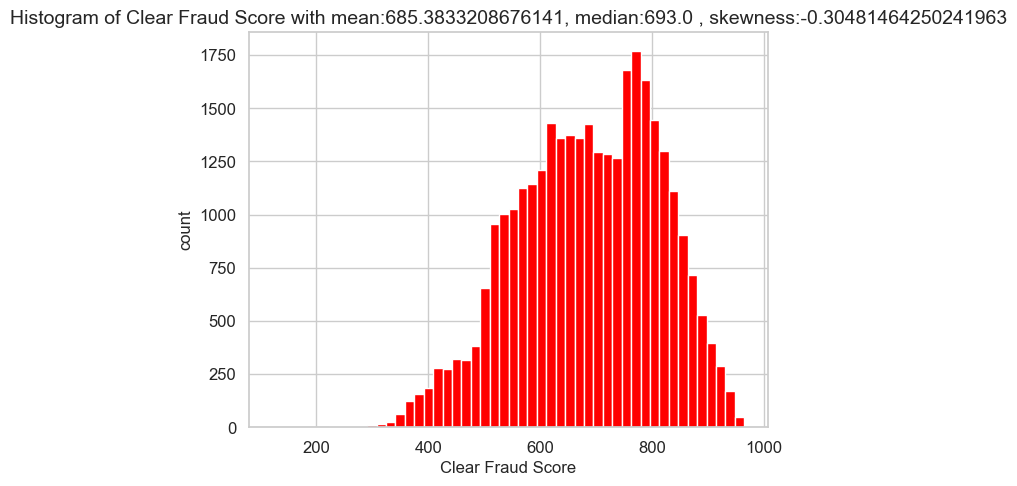

In [77]:
df['clearfraudscore'].plot(kind='hist', bins=50, color='red')
mean_value = df['clearfraudscore'].mean()
skewness_value = df['clearfraudscore'].skew()
median_value=df['clearfraudscore'].median()
plt.xlabel('Clear Fraud Score', fontsize=12)
plt.ylabel('count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.title(f'Histogram of Clear Fraud Score with mean:{mean_value}, median:{median_value} , skewness:{skewness_value}', fontsize=14)
plt.show()

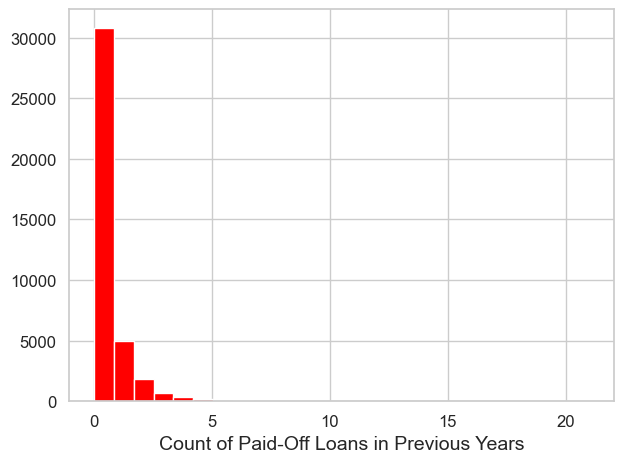

In [78]:
# Plot histogram of nPaidOff
df['nPaidOff'].plot(kind='hist', bins=25, color='red')
plt.xlabel('Count of Paid-Off Loans in Previous Years', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

- From above plot of "Clear Fraud Score" it is clear that skewness is little towards negaitve so, I can use median value to fill the null clearfraudscore
- From the "Paid-Off Loans plot" I can see that data is highly concentrated towards zero point so "mode value" is the best option to fill the empty/null slots for PaidOff

In [79]:
df.loc[df['clearfraudscore'].isna(), 'clearfraudscore'] = df['clearfraudscore'].median()
df.loc[df['nPaidOff'].isna(), 'nPaidOff'] = df['nPaidOff'].mode()[0]

In [80]:
# as disccused previously about df strcuture let us perfrom the column restructuring
# Column Drop
df = df.drop(columns=['state', 'fpStatus', 'hasCF'])

# Ordinal-encoding
'''
 as per loan.csv details
i. B is biweekly payments
ii. I is irregular
iii. M is monthly
iv. S is semi monthly
v. W is weekly
'''
df['payFrequency'] = df['payFrequency'].map({'B': 0, 
                                             'I': 1, 
                                             'M': 2,
                                             'S': 3,
                                             'W': 4})
# Onehot-encoding
df = pd.get_dummies(df, columns=['leadType'])
# Display results


In [62]:
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,0,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,0,879.0,False,False,False,False,False,False,False,True,False,False
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,0,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,0,693.0,False,False,False,False,False,False,True,False,False,False
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,4,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,40,658.0,False,False,False,False,True,False,False,False,False,False
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,3,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,0,835.0,False,False,False,False,False,False,True,False,False,False
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,0,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,10,624.0,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,0,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,0,693.0,False,False,False,False,False,False,False,False,True,False
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,2,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,25,700.0,False,False,False,False,True,False,False,False,False,False
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,0,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,40,806.0,False,False,False,False,True,False,False,False,False,False
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,0,625.0,2016-12-30T15:49:39.785000,2016-12-30T16:00:12.500000,0.0,New Loan,600.0,1868.88,25,769.0,False,False,False,False,True,False,False,False,False,False


In [81]:
set(df['loanStatus'])

{'Charged Off',
 'Charged Off Paid Off',
 'External Collection',
 'Internal Collection',
 'New Loan',
 'Paid Off Loan',
 'Pending Paid Off',
 'Returned Item',
 'Settled Bankruptcy',
 'Settlement Paid Off',
 'Settlement Pending Paid Off'}

In [82]:
'''
 Now I need to use this data to determine the status of application ..
 I have clearFraudScore but I can not determine the respective loan application status  and it can be determined with the flag of loanStatus

 loanStatus consist of : 
            {
                'Charged Off',                  => loan not paid (negative sign)  <===> MORE usefull
                
                'Charged Off Paid Off',         => paid with penalty (i guess)
                'External Collection',          => paid  but with help of external (may be agent) collection (i guess)
                'Internal Collection',          => paid  but with help of intermal (may be employee) collection (i guess)
                
                'New Loan',                     => loan application current state 
                'Paid Off Loan',                => loan paid off in full (positive sign)===> MORE usefull
                
                'Pending Paid Off',             => loan application current state 
                'Returned Item',                => loan application current state
                
                'Settled Bankruptcy',           => settlement with penalty ( negtive sign of declaring bankrupty) ==> MORE usefull 
                'Settlement Paid Off',          => loan paid off in full (positive sign) <===> MORE usefull
                
                'Settlement Pending Paid Off'   => setllement pending(may be some penalty pending) but paid off  (i guess)
            }



below code is for creating a new column based on loan status where 
Charged Off and Settled Bankruptcy  = 0 {defaulters}
Paid Off Loan and Settlement Paid Off = 1{non-defaulters}
'''

def loan_status_feature_mapping(application_status):
    labels = {0: ['Settled Bankruptcy', 'Charged Off'],
              1: ['Paid Off Loan', 'Settlement Paid Off']}
    
    for label, status in labels.items():
        if application_status in status:
            return label
        
df['loan_application_status'] = df['loanStatus'].map(loan_status_feature_mapping)
# Drop rows with no loan_application_status label 
df = df[df['loan_application_status'].notna()].reset_index(drop=True)



In [83]:
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,loan_application_status
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,0,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,0,879.0,False,False,False,False,False,False,False,True,False,False,1.0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,3,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,0,835.0,False,False,False,False,False,False,True,False,False,False,1.0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,0,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,10,624.0,True,False,False,False,False,False,False,False,False,False,1.0
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,4,404.1,2016-05-25T03:05:18.849000,2016-05-25T15:11:36.260000,3.0,Paid Off Loan,300.0,422.64,0,770.0,False,False,False,False,False,False,True,False,False,False,1.0
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,4,590.0,2015-05-26T17:02:27.312000,2015-05-26T18:45:48.024000,0.0,Paid Off Loan,300.0,896.87,6,693.0,True,False,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,0,645.0,2017-01-16T04:56:31.235000,2017-01-16T05:30:10.885000,0.0,Paid Off Loan,1500.0,5111.56,25,925.0,False,False,False,False,True,False,False,False,False,False,1.0
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,0,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,0,693.0,False,False,False,False,False,False,False,False,True,False,1.0
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,2,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,25,700.0,False,False,False,False,True,False,False,False,False,False,1.0
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,0,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,40,806.0,False,False,False,False,True,False,False,False,False,False,1.0


In [84]:
# count of deafuleted and non-defaulted loan applications in new df
df['loan_application_status'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

loan_application_status
1.0    97.38%
0.0     2.62%
Name: proportion, dtype: object

In [85]:
'''
A huge difference  : means given data not balanced 
loan_application_status
1.0    97.38% 
0.0     2.62%


also droping loanStatus now
'''
df.drop(columns=['loanStatus'],inplace=True)

In [88]:
#parsing date as per pandas library- date data was  iso format so using the same...initially got error without the format
df['applicationDate'] = pd.to_datetime(df['applicationDate'], format='ISO8601')
df['originatedDate'] = pd.to_datetime(df['originatedDate'], format='ISO8601')

df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,loan_application_status
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,0,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,3000.0,6395.19,0,879.0,False,False,False,False,False,False,False,True,False,False,1.0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,3,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,1250.0,3313.78,0,835.0,False,False,False,False,False,False,True,False,False,False,1.0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,0,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,800.0,2432.08,10,624.0,True,False,False,False,False,False,False,False,False,False,1.0
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,4,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,300.0,422.64,0,770.0,False,False,False,False,False,False,True,False,False,False,1.0
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,4,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,300.0,896.87,6,693.0,True,False,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,0,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,1500.0,5111.56,25,925.0,False,False,False,False,True,False,False,False,False,False,1.0
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,0,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,600.0,1670.18,0,693.0,False,False,False,False,False,False,False,False,True,False,1.0
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,2,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,375.0,1042.40,25,700.0,False,False,False,False,True,False,False,False,False,False,1.0
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,0,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,400.0,664.12,40,806.0,False,False,False,False,True,False,False,False,False,False,1.0


In [89]:
'''
From above df, I can also determine the time between two consecutive loans as it can help us in determining the applicant profile strength how soon the applicant is appkying after rejection or even after loan orogination

can be done by using the [applicationDate and the anon_ssn] to filter the applications by anon_ssn{represents ssn number which will be unique for one applicant }
and applicant with only one loan application can have this value as -1
'''

tmp_df = df.sort_values(by=['anon_ssn', 'applicationDate']).copy()
# Compute the days between consecutive applications
df['time_since_last'] = tmp_df.groupby('anon_ssn')['applicationDate'].diff().dt.total_seconds() / (24 * 60 * 60)
# Fill NaN values
df['time_since_last'] = df['time_since_last'].fillna(-1)

df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,loan_application_status,time_since_last
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,0,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,3000.0,6395.19,0,879.0,False,False,False,False,False,False,False,True,False,False,1.0,-1.000000
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,3,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,1250.0,3313.78,0,835.0,False,False,False,False,False,False,True,False,False,False,1.0,13.688801
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,0,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,800.0,2432.08,10,624.0,True,False,False,False,False,False,False,False,False,False,1.0,-1.000000
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,4,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,300.0,422.64,0,770.0,False,False,False,False,False,False,True,False,False,False,1.0,98.405253
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,4,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,300.0,896.87,6,693.0,True,False,False,False,False,False,False,False,False,False,1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,0,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,1500.0,5111.56,25,925.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,0,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,600.0,1670.18,0,693.0,False,False,False,False,False,False,False,False,True,False,1.0,-1.000000
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,2,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,375.0,1042.40,25,700.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,0,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,400.0,664.12,40,806.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000


In [90]:
'''
As of now I am not sure -  but I may also need time to get approved after the appliaction is submitted.
Let us create this feature too using 
        applicationDate{tells the client submitted the application}
        originatedDate{tells about the loan origination}

it is simple to calcute divide the originatedDate by application date by converting to hours
'''
df['time_to_get_loan_orignated_status'] = (df['originatedDate'] - df['applicationDate']).dt.seconds / 3600
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,loan_application_status,time_since_last,time_to_get_loan_orignated_status
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,0,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,3000.0,6395.19,0,879.0,False,False,False,False,False,False,False,True,False,False,1.0,-1.000000,17.695000
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,3,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,1250.0,3313.78,0,835.0,False,False,False,False,False,False,True,False,False,False,1.0,13.688801,0.199167
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,0,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,800.0,2432.08,10,624.0,True,False,False,False,False,False,False,False,False,False,1.0,-1.000000,5.949444
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,4,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,300.0,422.64,0,770.0,False,False,False,False,False,False,True,False,False,False,1.0,98.405253,12.104722
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,4,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,300.0,896.87,6,693.0,True,False,False,False,False,False,False,False,False,False,1.0,-1.000000,1.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,0,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,1500.0,5111.56,25,925.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000,0.560833
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,0,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,600.0,1670.18,0,693.0,False,False,False,False,False,False,False,False,True,False,1.0,-1.000000,0.508889
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,2,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,375.0,1042.40,25,700.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000,0.283611
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,0,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,400.0,664.12,40,806.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000,20.601111


In [91]:
'''
and I cand drop originatedDate and applicationDate as they are not needed {added later on after visualzation as I can use time_to_get_loan_originated_status for deciding loan status}

'''
df.drop(columns=['applicationDate', 'originatedDate'], inplace=True)

# I guess we dont need more and let us visualize

### Behind the scene definition from internet:
 - Skewness is a measure of the asymmetry of the probability distribution.
      - A high skewness value typically calls for some form of transformation (like log or Box-Cox) to normalize the distribution
 - Normalization typically refers to the process of scaling individual samples to have unit norm. This can be useful for algorithms that depend on the length of 
   the feature vectors, like SVMs.
 - Standardization (Scaling) refers to shifting the distribution of each feature to have a mean of zero and a standard deviation of one (unit variance). 

 - Corelation Heatmap:
     - A value close to 1 implies a strong positive correlation; as one feature increases, the other tends to increase.
     - A value close to -1 implies a strong negative correlation; as one feature increases, the other tends to decrease.
     - A value around 0 implies no correlation; the features do not have a linear relationship.



In [92]:
df_copy = df.copy() # creating copy for visualization so that I dont make chnages in DF

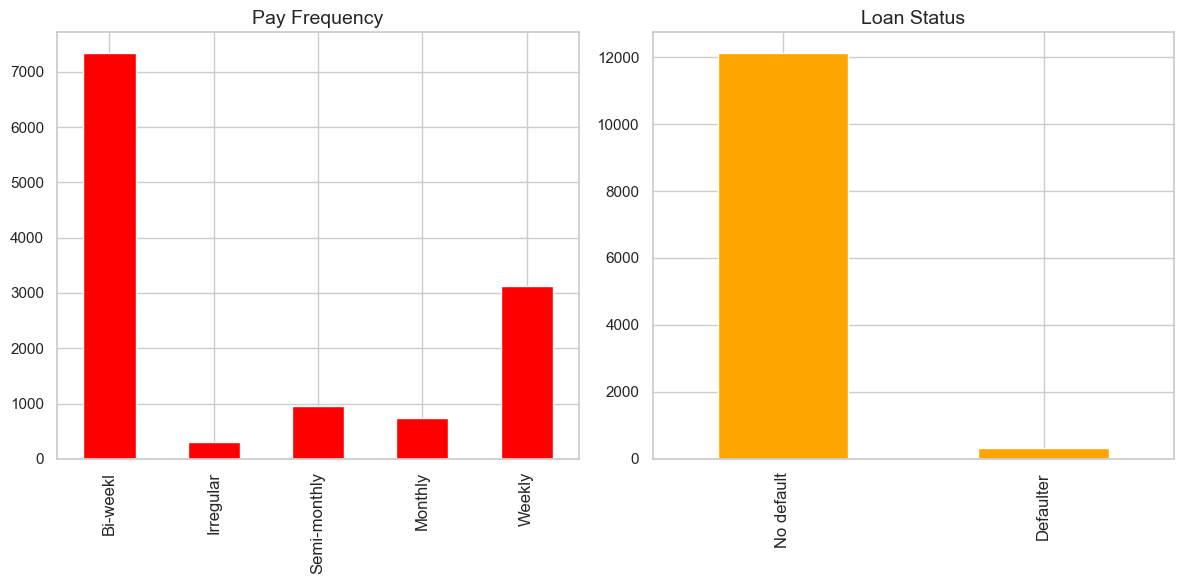

In [95]:
'''
Let us start by detemining by loan repayment startegy or trend among coustomers
 
i. B is biweekly payments
ii. I is irregular
iii. M is monthly
iv. S is semi monthly
v. W is weekly
'''
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df_copy.groupby(['payFrequency']).size().plot(kind='bar', color='red', ax=ax[0])
ax[0].set_title('Pay Frequency', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_xticks(range(len(['Bi-weekl', 'Irregular', 'Semi-monthly', 'Monthly', 'Weekly'])))
ax[0].set_xticklabels(['Bi-weekl', 'Irregular', 'Semi-monthly', 'Monthly', 'Weekly'], fontsize=12)

df_copy['loan_application_status'].value_counts().plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Loan Status', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['No default', 'Defaulter'], fontsize=12)

plt.tight_layout()
plt.savefig('../../data/plots/loan_application_status_with_repay_trends_bargraph.png', format='png')
plt.show()

In [ ]:
'''
from above it is seen that  Bi-weekely is much prefered trend and then weekely
'''

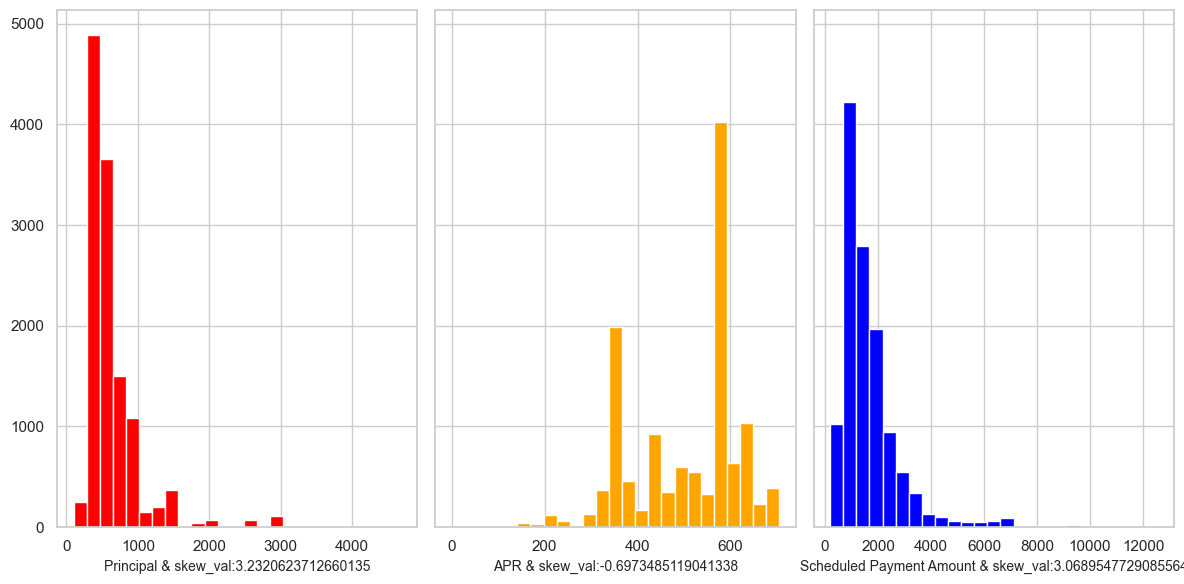

In [102]:
'''
As I myself have taken education loan to study, so what comes in my mind is I can also vsiualize a trend between
- Prinicipal amount
- APR
- Repayment amount 
This can give idea on in which combination maximum repayment is done and I can corelate between the new loan application and if it lies in this respective combinations of {Principle, APR and repayemnt amount} and likelihoosd of getting approved

'''

fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

df_copy['loanAmount'].plot(kind='hist', bins=25, color='red', ax=ax[0])
df_copy['apr'].plot(kind='hist', bins=25, color='orange', ax=ax[1])
df_copy['originallyScheduledPaymentAmount'].plot(kind='hist', bins=25, color='blue', ax=ax[2])
loan_amt_skew_val=df_copy['loanAmount'].skew()
apr_skew_val=df_copy['apr'].skew()
repay_amnt_skew_val=df_copy['originallyScheduledPaymentAmount'].skew()


ax[0].set_xlabel(f'Principal & skew_val:{loan_amt_skew_val}', fontsize=10)
ax[0].set_ylabel('')
ax[1].set_xlabel(f'APR & skew_val:{apr_skew_val}', fontsize=10)
ax[2].set_xlabel(f'Scheduled Payment Amount & skew_val:{repay_amnt_skew_val}', fontsize=10)

plt.tight_layout()
plt.savefig('../../data/plots/corelation_btwn_principal_apr_repayment_amt.png', format='png')
plt.show()

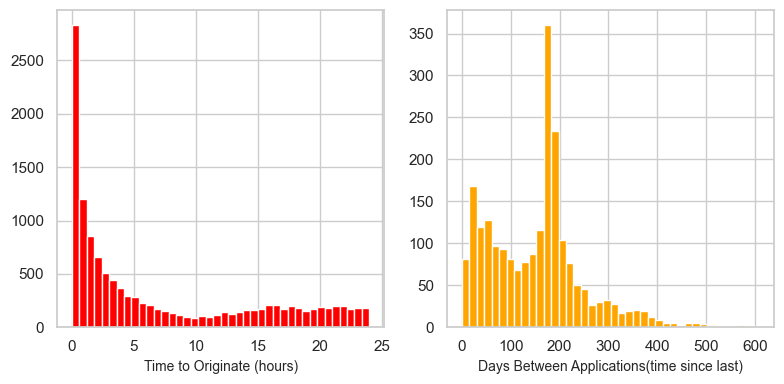

In [123]:
'''
A very skewed data ..hmmmmm

for principal plot: most loans have a lower principal, but there are a few loans with very high principal amounts

for apr plot: appears to be bimodal, i.e. two distinct peaks, and it has a negative skewness value. 
               There are two common APR values where loans tend to cluster.

for schedule payment: scheduled payment amount is right-skewed, with most of the data clustered at the lower end

'''

'''
Also, let us visualise features created by us : time_to_get_loan_orignated_status and time_since_last
'''
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

df_copy['time_to_get_loan_orignated_status'].plot(kind='hist', bins=40, color='red', ax=ax[0])
# Exclude non-returning applications
df_copy[df_copy['time_since_last'] >= 0]['time_since_last'].plot(kind='hist', bins=40, color='orange', ax=ax[1])

ax[0].set_xlabel('Time to Originate (hours)', fontsize=10)
ax[0].set_ylabel('')
ax[1].set_xlabel('Days Between Applications(time since last)', fontsize=10)
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../../data/plots/turnover_clients.png', format='png')
plt.show()

In [ ]:
'''
Interpretation from above :
First plot time to originate : many loan applications gets originated within a few hours after creation,
days between application: it is a bimodal distribution with two peaks, suggesting that there are two common patterns of reapplication behavior among clients.

'''

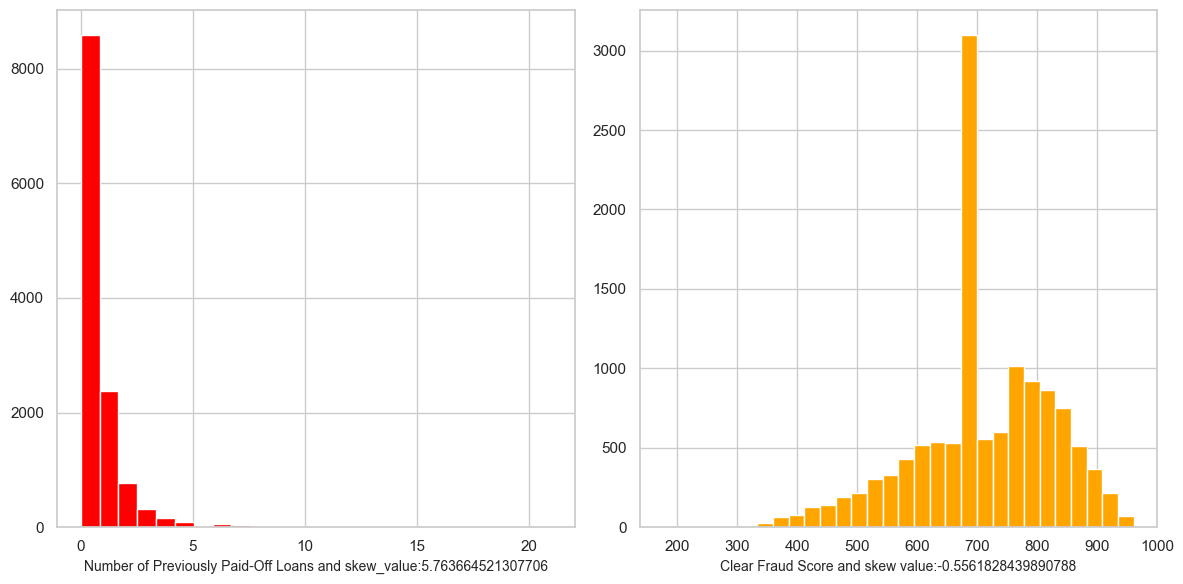

In [121]:
'''
finally lets visualize nPaidOff and clearfraudscore ==> how much coreraltion between these two and how number of paid off effect clear fraud score
'''

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df_copy['nPaidOff'].plot(kind='hist', bins=25, color='red', ax=ax[0])
df_copy['clearfraudscore'].plot(kind='hist', bins=30, color='orange', ax=ax[1])
paid_off_skew_val=df_copy['nPaidOff'].skew()
fraud_score_skew_val=df_copy['clearfraudscore'].skew()
ax[0].set_xlabel(f'Number of Previously Paid-Off Loans and skew_value:{paid_off_skew_val}', fontsize=10)
ax[0].set_ylabel('')

ax[1].set_xlabel(f'Clear Fraud Score and skew value:{fraud_score_skew_val}', fontsize=10)
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../../data/plots/relation_between_cleint_paying_freq_and_fraud_score.png', format='png')
plt.show()

In [116]:
'''
from above nPaidOff is highky scewed towards zero with a high positive skew value and suggests that while most clients have a low number of previously paid-off loans
clear fraud score have a peak at aroung 700 and also shows multi-modal distribution with several peaks.

'''

'\nInterpretation from above :\n'

In [108]:
df_copy

,anon_ssn,payFrequency,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,loan_application_status,time_since_last,time_to_get_loan_orignated_status
0,464f5d9ae4fa09ece4048d949191865c,0,199.0,0.0,3000.0,6395.19,0,879.0,False,False,False,False,False,False,False,True,False,False,1.0,-1.000000,17.695000
1,bc9fa73468acf18cb968a3a6a3c4697c,3,490.0,2.0,1250.0,3313.78,0,835.0,False,False,False,False,False,False,True,False,False,False,1.0,13.688801,0.199167
2,10cefd11d41612b032fd9cd2debe32dc,0,590.0,0.0,800.0,2432.08,10,624.0,True,False,False,False,False,False,False,False,False,False,1.0,-1.000000,5.949444
3,1d249e27292d25e4d3b4bc142a2a4aea,4,404.1,3.0,300.0,422.64,0,770.0,False,False,False,False,False,False,True,False,False,False,1.0,98.405253,12.104722
4,2a10b2e04c5eec9a47a8cf5b9b81a2b8,4,590.0,0.0,300.0,896.87,6,693.0,True,False,False,False,False,False,False,False,False,False,1.0,-1.000000,1.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,c81e355845a451b77c29b6515efa2578,0,645.0,0.0,1500.0,5111.56,25,925.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000,0.560833
12457,55392b05f72f8c3e32e5157612406ba8,0,565.0,3.0,600.0,1670.18,0,693.0,False,False,False,False,False,False,False,False,True,False,1.0,-1.000000,0.508889
12458,73690518af906288434b2a0cfd972fe0,2,645.0,0.0,375.0,1042.40,25,700.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000,0.283611
12459,0538f828b4a0b44502ead5a8033ee779,0,449.0,0.0,400.0,664.12,40,806.0,False,False,False,False,True,False,False,False,False,False,1.0,-1.000000,20.601111


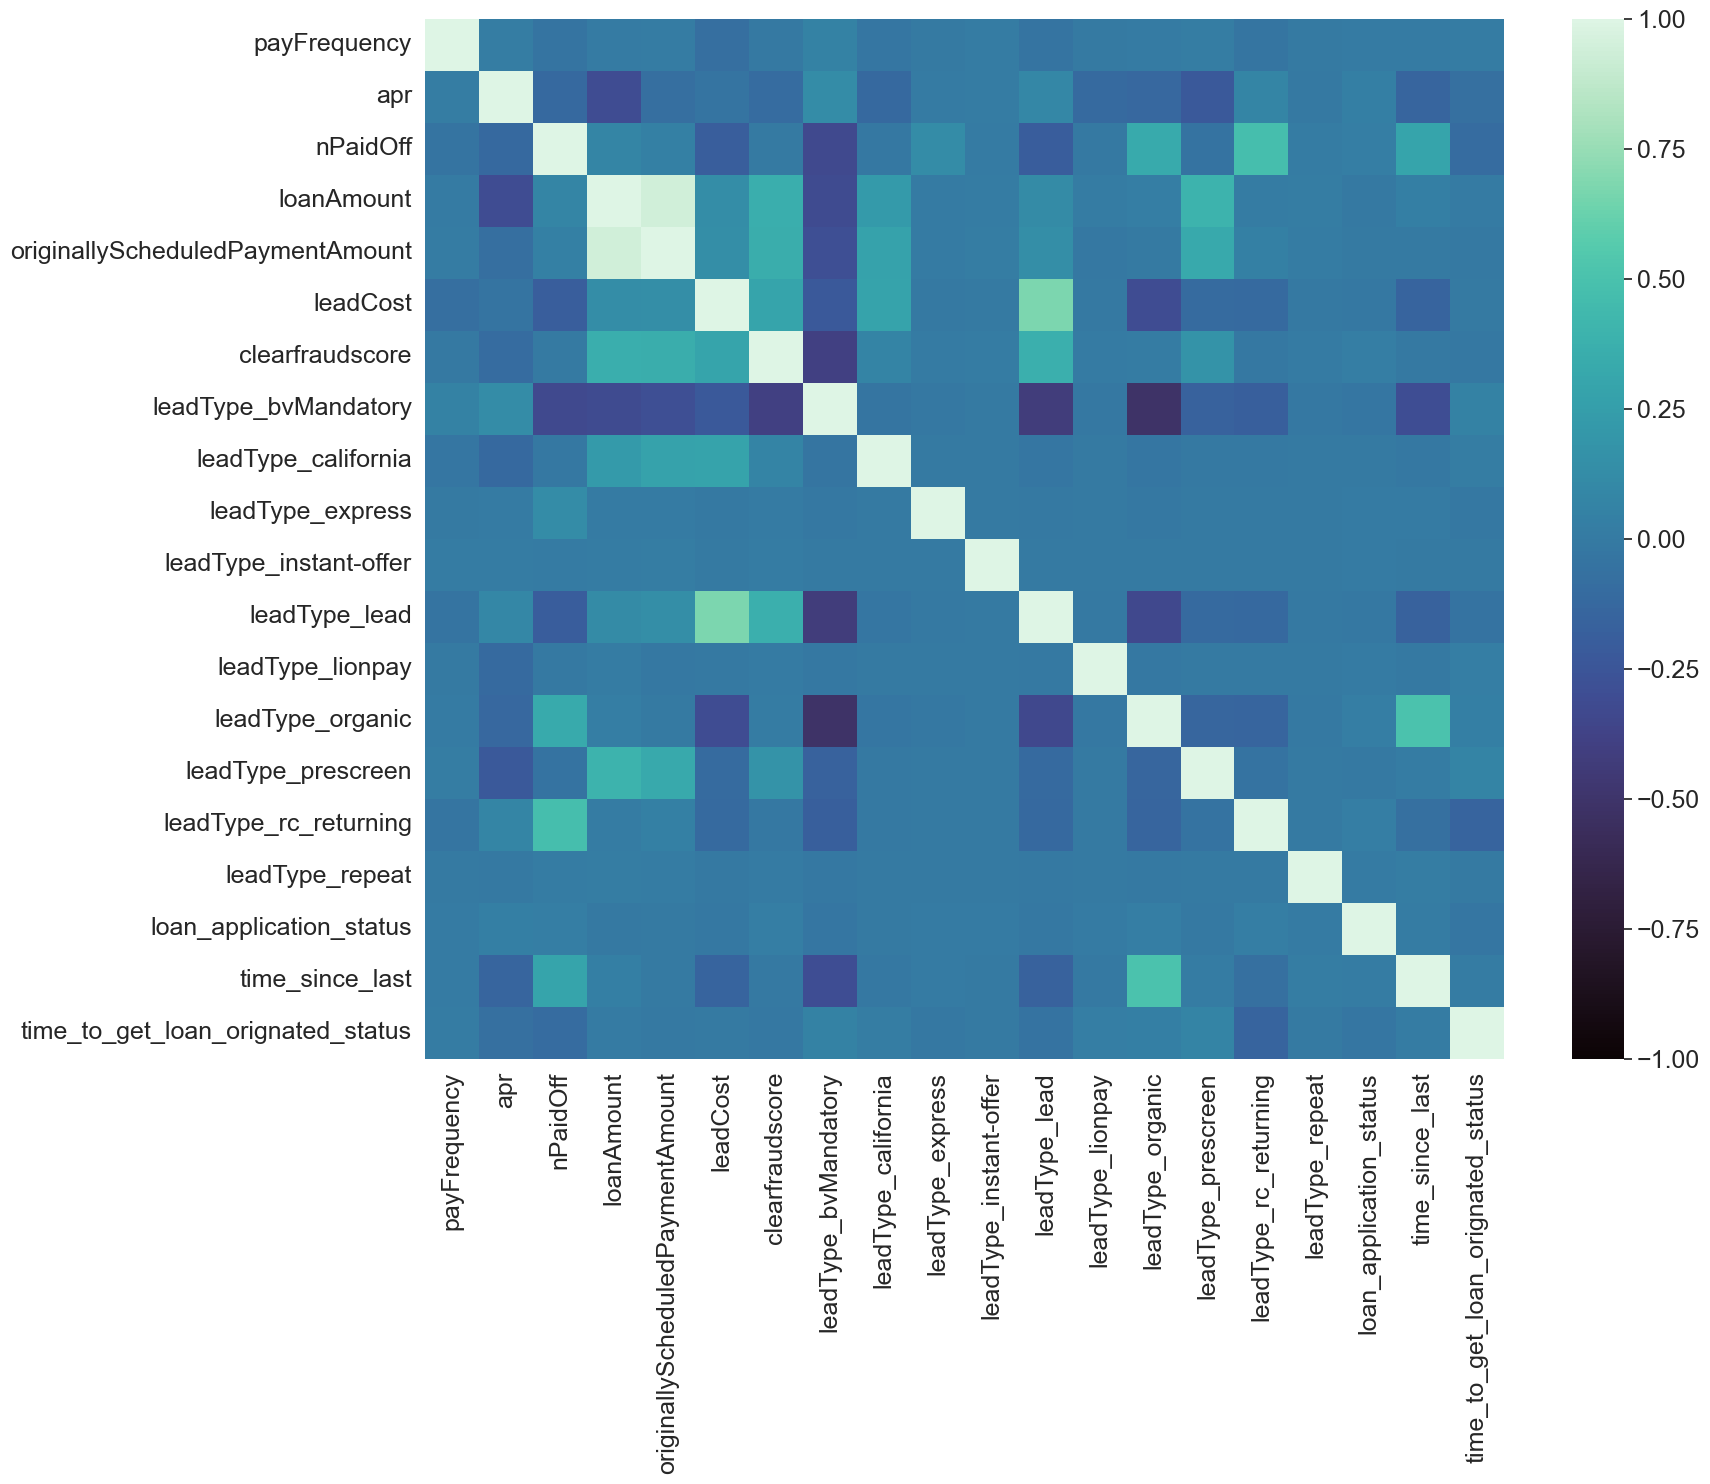

In [111]:
'''
 Finally let us see the corelation betwenn different columns in df so that we can handle the highly corelaetd data to avoid any kinf od overfitting, and do proper model training
below code from documentation of heatmap

initially i received below error:
  1730                 arr.flags.writeable = False
...
-> 1794             result[rl.indexer] = arr
   1795             itemmask[rl.indexer] = 1
   1796 

ValueError: could not convert string to float: 'LL-I-06644937'

then i fixed it: it was coming due mapping of non-numeric data used in dataframe.corr so mapped boolean to numeric values and droped columns like loanID
 '''
# Filter numeric types for correlation matrix calculation
# Convert boolean columns to int
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

for column in df_copy.columns:
    if df_copy[column].dtype == 'bool':
        df_copy[column] = df_copy[column].astype(int)

numeric_df = df_copy.select_dtypes(include=[np.number])

plt.figure(figsize=(18, 15))
corr_heatmap = sns.heatmap(numeric_df.corr(), vmin=-1.0, cmap='mako', annot_kws={"fontsize": 13})

corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(), fontsize=18)
corr_heatmap.set_yticklabels(corr_heatmap.get_yticklabels(), fontsize=18)
cbar = corr_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

plt.tight_layout()
plt.savefig('../../data/plots/correlation_heatmap.png', format='png')
plt.show()

In [117]:
'''
Interpretation from above corerelation  heat map

from above correlation plot 
Monetary values (loanAmount & originallyScheduledPaymentAmount) are highly correlated and can benefit  from scaling

Counts quantity (like nPaidOff) could also be scaled

'''

'\nfrom above correlation plot \n'

# Preprocessing

- From the plottings above we can say that :
    -  for nPaidOff, time_to_originate : box-cox transformation can be applied to the positively skewed features 
    
    - for loanAmount, originallyScheduledPaymentAmount : 
                     min-max scaling to handle the   outliers  [scales the data to fit within a specific range, typically [0,  1], ]
    
    - Since clearFraudScore represents multimodal due to several peaks but close enough to gausian plot so we can use z-score here:
       z-score standardization (clearfraudscore)[to ensure that the mean of the distribution is 0 and the standard deviation is 1]

In [125]:
# Min-max scaling
scaler = MinMaxScaler()
df[['loanAmount', 'originallyScheduledPaymentAmount']] = scaler.fit_transform(df[['loanAmount', 'originallyScheduledPaymentAmount']])

# Z-score standardization
mean, stdev = df['clearfraudscore'].mean(), df['clearfraudscore'].std()
df['clearfraudscore'] = (df['clearfraudscore'] - mean) / stdev

# Box-cox transformation
cols = ['nPaidOff', 'time_to_get_loan_orignated_status']
for col in cols:
    df[col], _ = boxcox(df[col] + 1)



In [127]:
df.describe()

,payFrequency,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,loan_application_status,time_since_last,time_to_get_loan_orignated_status
count,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,1.246100e+04,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000
mean,1.357034,508.946662,0.033975,0.115391,0.119181,12.109863,-2.508938e-17,0.390338,0.002087,0.000722,0.000080,0.222454,0.000803,0.289704,0.042372,0.050959,0.000482,0.973838,26.693385,1.396005
std,1.740799,117.319897,0.050687,0.098487,0.097303,24.749500,1.000000e+00,0.487846,0.045632,0.026866,0.008958,0.415911,0.028318,0.453643,0.201445,0.219923,0.021939,0.159622,72.233430,0.905245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.591849e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,390.000000,0.000000,0.054502,0.061628,0.000000,-4.705636e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.524981
50%,0.000000,565.000000,0.000000,0.087203,0.090215,3.000000,-1.429300e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.340252
75%,4.000000,590.000000,0.108375,0.130804,0.141995,10.000000,7.278856e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,2.353785
max,4.000000,705.590000,0.112238,1.000000,1.000000,200.000000,2.167749e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,608.884541,2.747909


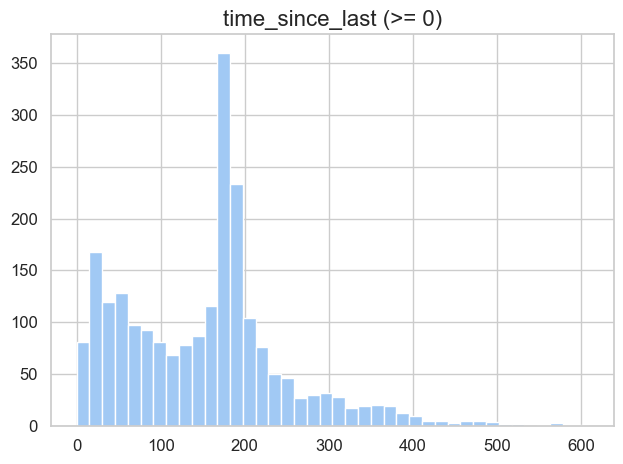

In [129]:
df[df['time_since_last'] >= 0]['time_since_last'].plot(kind='hist', bins=40)
plt.title('time_since_last (>= 0)', fontsize=16)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('../images/normalized_feature_distributions_correction.png', format='png')
plt.show()

In [130]:
# saving the feature engineered dataframe to use in the model pipeline 
# column to be used as target: loan_application_status

df.to_csv('../../data/feature_engineered_loan.csv', index=False, sep=',', header=True, encoding='utf-8')


## I am going to use this exploratation feature-engeering, data manipulation in our pre-processing stage in pipelne